In [1]:
import json
import spotipy as spot
import pandas as pd

In [2]:
# Use Hydra later
config = json.load(open(file="config.json", encoding="utf-8"))
config

{'CLIENT_ID': '468b8b024bfb41d5b1957dad2afc766a',
 'CLIENT_SECRET': '8827668f8ed64f13bf8c2e83781c3997',
 'REDIRECT_URI': 'http://localhost:8080'}

In [3]:
scope = "user-read-recently-played"

In [4]:
auth = spot.SpotifyOAuth(client_id=config["CLIENT_ID"],
    client_secret=config["CLIENT_SECRET"],
    redirect_uri=config["REDIRECT_URI"])

In [5]:
sp = spot.Spotify(auth_manager=auth)

In [6]:
results = sp.current_user_recently_played()

In [7]:
play_count = {}
for item in results['items']:
    track = item['track']
    artist = track['artists'][0]['name']
    if artist in play_count:
        play_count[artist]+=1
    else:
        play_count[artist]=1

In [8]:
df = pd.DataFrame.from_dict(play_count, orient='index')
df.columns = ['Play Count']
df.sort_values(by='Play Count', inplace=True, ascending=False)
df.head()

,Play Count
Logic,3
Jack Harlow,2
Quando Rondo,2
Kendrick Lamar,1
A Boogie Wit da Hoodie,1


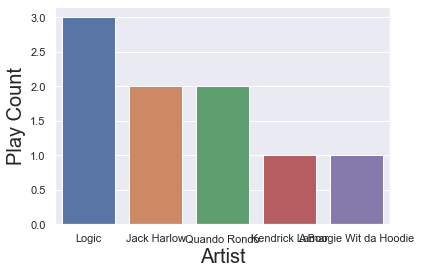

<Figure size 2160x2160 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5 = df.head()

sns.set()
sns.barplot(x=top_5.index, y=top_5['Play Count'])

plt.xlabel("Artist", fontsize=20)
plt.ylabel("Play Count", fontsize=20)
plt.figure(figsize=(30,30))

plt.show()

In [10]:
tracks = []
unique = []
for item in results['items']:
    track = item['track']
    if track['name'] in unique:
        continue
    info = [track['name'], track['album']['name'], track['artists'][0]['name']]
    tracks.append(info)
    unique.append(track['name'])
print(tracks[0])

['Sunflower (feat. Steve Lacy)', 'Father of the Bride', 'Vampire Weekend']


In [11]:
tracks_df = pd.DataFrame(tracks, columns=['Name', 'Album', 'Artist'])
tracks_df.head()

,Name,Album,Artist
0,Sunflower (feat. Steve Lacy),Father of the Bride,Vampire Weekend
1,m y . l i f e (with 21 Savage & Morray),The Off-Season,J. Cole
2,Wurli,What Could Possibly Go Wrong,Dominic Fike
3,Headlocc (feat. Young Thug),Headlocc (feat. Young Thug),Yella Beezy
4,going out,our little angel - EP,ROLE MODEL


In [12]:
tracks_df[tracks_df['Artist'].str[0]=='E']

,Name,Album,Artist
8,Legacy,The Marshall Mathers LP2 (Deluxe),Eminem


In [13]:
results.keys()

dict_keys(['items', 'next', 'cursors', 'limit', 'href'])

In [14]:
print(results['items'][0].keys())
print(len(results['items']))

dict_keys(['track', 'played_at', 'context'])
50


In [15]:
item_dict = results['items'][0]

In [16]:
item_dict['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [46]:
item_dict['track']['album'].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [52]:
artist_id = item_dict['track']['artists'][0]['id']
artist_id

'5BvJzeQpmsdsFp4HGUYUEx'

In [17]:
item_dict['track']['id']

'53KFMdxzi8IJDewiql1Qo3'

In [18]:
item_dict['track']['artists'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/5BvJzeQpmsdsFp4HGUYUEx'},
 'href': 'https://api.spotify.com/v1/artists/5BvJzeQpmsdsFp4HGUYUEx',
 'id': '5BvJzeQpmsdsFp4HGUYUEx',
 'name': 'Vampire Weekend',
 'type': 'artist',
 'uri': 'spotify:artist:5BvJzeQpmsdsFp4HGUYUEx'}

In [19]:
item_dict['track']['name']

'Sunflower (feat. Steve Lacy)'

In [20]:
item_dict['track']['album']

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5BvJzeQpmsdsFp4HGUYUEx'},
   'href': 'https://api.spotify.com/v1/artists/5BvJzeQpmsdsFp4HGUYUEx',
   'id': '5BvJzeQpmsdsFp4HGUYUEx',
   'name': 'Vampire Weekend',
   'type': 'artist',
   'uri': 'spotify:artist:5BvJzeQpmsdsFp4HGUYUEx'}],
 'available_markets': ['AD',
  'AE',
  'AG',
  'AL',
  'AM',
  'AO',
  'AR',
  'AT',
  'AU',
  'AZ',
  'BA',
  'BB',
  'BD',
  'BE',
  'BF',
  'BG',
  'BH',
  'BI',
  'BJ',
  'BN',
  'BO',
  'BR',
  'BS',
  'BT',
  'BW',
  'BY',
  'BZ',
  'CA',
  'CD',
  'CG',
  'CH',
  'CI',
  'CL',
  'CM',
  'CO',
  'CR',
  'CV',
  'CW',
  'CY',
  'CZ',
  'DE',
  'DJ',
  'DK',
  'DM',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FJ',
  'FM',
  'FR',
  'GA',
  'GB',
  'GD',
  'GE',
  'GH',
  'GM',
  'GN',
  'GQ',
  'GR',
  'GT',
  'GW',
  'GY',
  'HK',
  'HN',
  'HR',
  'HT',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IQ',
  'IS',
  'IT',
  'JM',
  'JO',
  

In [21]:
item_dict['track']['explicit']

False

In [22]:
item_dict['track']['duration_ms']

137600

In [23]:
item_dict['track']['popularity']

57

In [24]:
item_dict['track']['is_local']

False

In [25]:
def get_info(track):
    track_id = track['id']
    song_name = track['name']
    album_id = track['album']['id']
    album_name = track['album']['name']
    artist_id = track['artists'][0]['id']
    artist_name = track['artists'][0]['name']
    explicit = track['explicit']
    duration = track['duration_ms']
    song_popularity = track['popularity']
    album_release_date = track['album']['release_date']
    return [track_id, song_name, album_id, album_name, artist_id,
        artist_name, explicit, duration, song_popularity, album_release_date]

In [26]:
all_tracks = []
for item in results['items']:
    all_tracks.append(get_info(item['track']))

In [27]:
headers = ['Track ID', 'Song Name', 'Album ID', 'Album Name', 'Artist ID',
    'Artist Name', 'Explicit', 'Duration', 'Song Popularity',
    'Album Release Date']
tracks_df = pd.DataFrame(all_tracks, columns=headers)
tracks_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date
0,53KFMdxzi8IJDewiql1Qo3,Sunflower (feat. Steve Lacy),1A3nVEWRJ8yvlPzawHI1pQ,Father of the Bride,5BvJzeQpmsdsFp4HGUYUEx,Vampire Weekend,False,137600,57,2019-05-03
1,1D3z6HTiQsNmZxjl7F7eoG,m y . l i f e (with 21 Savage & Morray),4JAvwK4APPArjIsOdGoJXX,The Off-Season,6l3HvQ5sa6mXTsMTB19rO5,J. Cole,True,218801,79,2021-05-14
2,5MSshyHGM9ajWSEoBcR0jv,Wurli,1BubKJqf6Uc4fNae5kLJJ7,What Could Possibly Go Wrong,6USv9qhCn6zfxlBQIYJ9qs,Dominic Fike,False,150620,62,2020-07-31
3,0RV9wVTrrX9OadfiEqKGdF,Headlocc (feat. Young Thug),1Im2OU9CCCVNkvBk9CRcws,Headlocc (feat. Young Thug),7kwCkEJ384PWm0UQW3hxjS,Yella Beezy,True,202276,52,2020-04-10
4,3hDNIAnUnraurZCuiuPegu,going out,6RIPoDTAV7hnyBAM5xrKVV,our little angel - EP,1dy5WNgIKQU6ezkpZs4y8z,ROLE MODEL,True,174493,56,2020-10-21


In [28]:
tracks_df['Analysis'] = sp.audio_features(tracks_df['Track ID'].to_list())
tracks_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date,Analysis
0,53KFMdxzi8IJDewiql1Qo3,Sunflower (feat. Steve Lacy),1A3nVEWRJ8yvlPzawHI1pQ,Father of the Bride,5BvJzeQpmsdsFp4HGUYUEx,Vampire Weekend,False,137600,57,2019-05-03,"{'danceability': 0.863, 'energy': 0.576, 'key'..."
1,1D3z6HTiQsNmZxjl7F7eoG,m y . l i f e (with 21 Savage & Morray),4JAvwK4APPArjIsOdGoJXX,The Off-Season,6l3HvQ5sa6mXTsMTB19rO5,J. Cole,True,218801,79,2021-05-14,"{'danceability': 0.597, 'energy': 0.587, 'key'..."
2,5MSshyHGM9ajWSEoBcR0jv,Wurli,1BubKJqf6Uc4fNae5kLJJ7,What Could Possibly Go Wrong,6USv9qhCn6zfxlBQIYJ9qs,Dominic Fike,False,150620,62,2020-07-31,"{'danceability': 0.482, 'energy': 0.837, 'key'..."
3,0RV9wVTrrX9OadfiEqKGdF,Headlocc (feat. Young Thug),1Im2OU9CCCVNkvBk9CRcws,Headlocc (feat. Young Thug),7kwCkEJ384PWm0UQW3hxjS,Yella Beezy,True,202276,52,2020-04-10,"{'danceability': 0.961, 'energy': 0.571, 'key'..."
4,3hDNIAnUnraurZCuiuPegu,going out,6RIPoDTAV7hnyBAM5xrKVV,our little angel - EP,1dy5WNgIKQU6ezkpZs4y8z,ROLE MODEL,True,174493,56,2020-10-21,"{'danceability': 0.754, 'energy': 0.632, 'key'..."


In [29]:
jsoned_tracks = pd.json_normalize(tracks_df['Analysis'])
jsoned_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.863,0.576,8,-5.691,1,0.0567,0.4060,0.008240,0.1410,0.9320,100.030,audio_features,53KFMdxzi8IJDewiql1Qo3,spotify:track:53KFMdxzi8IJDewiql1Qo3,https://api.spotify.com/v1/tracks/53KFMdxzi8IJ...,https://api.spotify.com/v1/audio-analysis/53KF...,137600,4
1,0.597,0.587,7,-7.026,0,0.1370,0.0622,0.000000,0.2140,0.0753,140.021,audio_features,1D3z6HTiQsNmZxjl7F7eoG,spotify:track:1D3z6HTiQsNmZxjl7F7eoG,https://api.spotify.com/v1/tracks/1D3z6HTiQsNm...,https://api.spotify.com/v1/audio-analysis/1D3z...,218802,4
2,0.482,0.837,11,-3.696,1,0.0639,0.3850,0.021600,0.1320,0.0787,91.968,audio_features,5MSshyHGM9ajWSEoBcR0jv,spotify:track:5MSshyHGM9ajWSEoBcR0jv,https://api.spotify.com/v1/tracks/5MSshyHGM9aj...,https://api.spotify.com/v1/audio-analysis/5MSs...,150620,4
3,0.961,0.571,6,-4.001,1,0.1770,0.0130,0.000000,0.0486,0.6410,125.004,audio_features,0RV9wVTrrX9OadfiEqKGdF,spotify:track:0RV9wVTrrX9OadfiEqKGdF,https://api.spotify.com/v1/tracks/0RV9wVTrrX9O...,https://api.spotify.com/v1/audio-analysis/0RV9...,202277,4
4,0.754,0.632,5,-5.616,1,0.0710,0.1780,0.000448,0.1420,0.5980,80.014,audio_features,3hDNIAnUnraurZCuiuPegu,spotify:track:3hDNIAnUnraurZCuiuPegu,https://api.spotify.com/v1/tracks/3hDNIAnUnrau...,https://api.spotify.com/v1/audio-analysis/3hDN...,174493,4


In [30]:
jsoned_tracks.sort_values(by=['danceability'], ascending=False, inplace=True)
jsoned_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
3,0.961,0.571,6,-4.001,1,0.1770,0.01300,0.000000,0.0486,0.641,125.004,audio_features,0RV9wVTrrX9OadfiEqKGdF,spotify:track:0RV9wVTrrX9OadfiEqKGdF,https://api.spotify.com/v1/tracks/0RV9wVTrrX9O...,https://api.spotify.com/v1/audio-analysis/0RV9...,202277,4
35,0.946,0.520,1,-3.309,1,0.1340,0.01100,0.000006,0.0814,0.859,139.950,audio_features,7rf7lJOYCRFpWnbRJE4C1w,spotify:track:7rf7lJOYCRFpWnbRJE4C1w,https://api.spotify.com/v1/tracks/7rf7lJOYCRFp...,https://api.spotify.com/v1/audio-analysis/7rf7...,116805,4
14,0.916,0.727,1,-6.556,1,0.0861,0.00214,0.000145,0.1180,0.201,94.997,audio_features,4PpuH4mxL0rD35mOWaLoKS,spotify:track:4PpuH4mxL0rD35mOWaLoKS,https://api.spotify.com/v1/tracks/4PpuH4mxL0rD...,https://api.spotify.com/v1/audio-analysis/4Ppu...,219707,4
41,0.905,0.563,8,-6.135,1,0.1020,0.02540,0.000010,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4
39,0.905,0.563,8,-6.135,1,0.1020,0.02540,0.000010,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4


In [31]:
merged_df = pd.merge(tracks_df, jsoned_tracks, how='inner', left_on='Track ID', right_on='id')
merged_df.drop(['Analysis'], inplace=True, axis=1)
merged_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,53KFMdxzi8IJDewiql1Qo3,Sunflower (feat. Steve Lacy),1A3nVEWRJ8yvlPzawHI1pQ,Father of the Bride,5BvJzeQpmsdsFp4HGUYUEx,Vampire Weekend,False,137600,57,2019-05-03,...,0.1410,0.9320,100.030,audio_features,53KFMdxzi8IJDewiql1Qo3,spotify:track:53KFMdxzi8IJDewiql1Qo3,https://api.spotify.com/v1/tracks/53KFMdxzi8IJ...,https://api.spotify.com/v1/audio-analysis/53KF...,137600,4
1,1D3z6HTiQsNmZxjl7F7eoG,m y . l i f e (with 21 Savage & Morray),4JAvwK4APPArjIsOdGoJXX,The Off-Season,6l3HvQ5sa6mXTsMTB19rO5,J. Cole,True,218801,79,2021-05-14,...,0.2140,0.0753,140.021,audio_features,1D3z6HTiQsNmZxjl7F7eoG,spotify:track:1D3z6HTiQsNmZxjl7F7eoG,https://api.spotify.com/v1/tracks/1D3z6HTiQsNm...,https://api.spotify.com/v1/audio-analysis/1D3z...,218802,4
2,5MSshyHGM9ajWSEoBcR0jv,Wurli,1BubKJqf6Uc4fNae5kLJJ7,What Could Possibly Go Wrong,6USv9qhCn6zfxlBQIYJ9qs,Dominic Fike,False,150620,62,2020-07-31,...,0.1320,0.0787,91.968,audio_features,5MSshyHGM9ajWSEoBcR0jv,spotify:track:5MSshyHGM9ajWSEoBcR0jv,https://api.spotify.com/v1/tracks/5MSshyHGM9aj...,https://api.spotify.com/v1/audio-analysis/5MSs...,150620,4
3,0RV9wVTrrX9OadfiEqKGdF,Headlocc (feat. Young Thug),1Im2OU9CCCVNkvBk9CRcws,Headlocc (feat. Young Thug),7kwCkEJ384PWm0UQW3hxjS,Yella Beezy,True,202276,52,2020-04-10,...,0.0486,0.6410,125.004,audio_features,0RV9wVTrrX9OadfiEqKGdF,spotify:track:0RV9wVTrrX9OadfiEqKGdF,https://api.spotify.com/v1/tracks/0RV9wVTrrX9O...,https://api.spotify.com/v1/audio-analysis/0RV9...,202277,4
4,3hDNIAnUnraurZCuiuPegu,going out,6RIPoDTAV7hnyBAM5xrKVV,our little angel - EP,1dy5WNgIKQU6ezkpZs4y8z,ROLE MODEL,True,174493,56,2020-10-21,...,0.1420,0.5980,80.014,audio_features,3hDNIAnUnraurZCuiuPegu,spotify:track:3hDNIAnUnraurZCuiuPegu,https://api.spotify.com/v1/tracks/3hDNIAnUnrau...,https://api.spotify.com/v1/audio-analysis/3hDN...,174493,4


In [32]:
artist_freq = merged_df.groupby(['Artist ID'])['Artist ID'].count()
top_5_artist_ids = artist_freq.nlargest(5).index.to_list()
top_5_artist_ids

['2LIk90788K0zvyj2JJVwkJ',
 '4IprNlQiJZUUJhDl0fL2SL',
 '4xRYI6VqpkE3UwrDrAZL8L',
 '0fA0VVWsXO9YnASrzqfmYu',
 '0niJkG4tKkne3zwr7I8n9n']

In [33]:
song_freq = merged_df.groupby(['Track ID'])['Track ID'].count()
top_5_track_ids = song_freq.nlargest(5).index.to_list()
top_5_track_ids

['1rDQ4oMwGJI7B4tovsBOxc',
 '78GMyn0DySzz89QudlyNhW',
 '01oPNCtTniFT3YM4K3ksTf',
 '0RV9wVTrrX9OadfiEqKGdF',
 '0aMHIW1lqrulVCx0LLlr6a']

In [34]:
danceability_df = merged_df.set_index('danceability')
danceability_df.sort_index(inplace=True, ascending=False)
danceability_df[['Song Name', 'Artist Name']].head()

,Song Name,Artist Name
danceability,,
0.961,Headlocc (feat. Young Thug),Yella Beezy
0.946,I Have a Dream,Shelley FKA DRAM
0.916,Lemon,N.E.R.D
0.905,First Class,Jack Harlow
0.905,First Class,Jack Harlow


In [35]:
danceability_df.columns

Index(['Track ID', 'Song Name', 'Album ID', 'Album Name', 'Artist ID',
       'Artist Name', 'Explicit', 'Duration', 'Song Popularity',
       'Album Release Date', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [36]:
genre_seeds = sp.recommendation_genre_seeds()
genres = genre_seeds['genres']
print(genres)

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-po

In [37]:
seed_genres = ['summer']
recommended = sp.recommendations(top_5_artist_ids)
recommended['tracks'][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [38]:
all_recommended = []
for item in recommended['tracks']:
    all_recommended.append(get_info(item))

In [39]:
headers = ['Track ID', 'Song Name', 'Album ID', 'Album Name', 'Artist ID',
    'Artist Name', 'Explicit', 'Duration', 'Song Popularity',
    'Album Release Date']
recommended_df = pd.DataFrame(all_tracks, columns=headers)
recommended_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date
0,53KFMdxzi8IJDewiql1Qo3,Sunflower (feat. Steve Lacy),1A3nVEWRJ8yvlPzawHI1pQ,Father of the Bride,5BvJzeQpmsdsFp4HGUYUEx,Vampire Weekend,False,137600,57,2019-05-03
1,1D3z6HTiQsNmZxjl7F7eoG,m y . l i f e (with 21 Savage & Morray),4JAvwK4APPArjIsOdGoJXX,The Off-Season,6l3HvQ5sa6mXTsMTB19rO5,J. Cole,True,218801,79,2021-05-14
2,5MSshyHGM9ajWSEoBcR0jv,Wurli,1BubKJqf6Uc4fNae5kLJJ7,What Could Possibly Go Wrong,6USv9qhCn6zfxlBQIYJ9qs,Dominic Fike,False,150620,62,2020-07-31
3,0RV9wVTrrX9OadfiEqKGdF,Headlocc (feat. Young Thug),1Im2OU9CCCVNkvBk9CRcws,Headlocc (feat. Young Thug),7kwCkEJ384PWm0UQW3hxjS,Yella Beezy,True,202276,52,2020-04-10
4,3hDNIAnUnraurZCuiuPegu,going out,6RIPoDTAV7hnyBAM5xrKVV,our little angel - EP,1dy5WNgIKQU6ezkpZs4y8z,ROLE MODEL,True,174493,56,2020-10-21


In [40]:
tracks_df['Song Name'].unique()

array(['Sunflower (feat. Steve Lacy)',
       'm y . l i f e (with 21 Savage & Morray)', 'Wurli',
       'Headlocc (feat. Young Thug)', 'going out', 'No More',
       'Dead to Me', 'She Know (feat. Lil Baby)', 'Legacy',
       '11 Minutes (with Halsey feat. Travis Barker)', 'Masterpiece',
       'Semi-Charmed Life', 'Baptized In Fire', 'Cocoa Butter Kisses',
       'Lemon', 'New House', 'Titanic', 'London Bridge',
       'When We Were Young', 'Kiss Me Kiss Me', 'Opposite of Adults',
       'Rags2Riches 2 (feat. Lil Baby)', 'Messed Up', 'Screen',
       'Heard Em Say', 'Rooftops (feat. Curren$y)', "7 Mac 11's",
       'Unbreakable', 'DISPOSABLE FIX', 'Heart Attack',
       'Space Ghost Coast To Coast (with Bree Runway)', 'Run It',
       'Like Woah', 'Be a Toy', 'I Have a Dream', 'Forrest Gump',
       'Rigamortus', 'Woah (feat. Jeremih)', 'First Class', 'ACID TRIP',
       'Headfirst Slide Into Cooperstown On A Bad Bet',
       'Everyday We Lit (feat. PnB Rock)', 'Paralyzer', 'No Cap',

In [41]:
# song = danceability_df[danceability_df['Song Name']=='The Force Theme']
song = danceability_df.drop_duplicates()
song = song.head(10)
song.loc[:, ('energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'Song Name', 'Artist Name')]
# song.columns

,energy,acousticness,instrumentalness,liveness,valence,Song Name,Artist Name
danceability,,,,,,,
0.961,0.571,0.01300,0.000000,0.0486,0.641,Headlocc (feat. Young Thug),Yella Beezy
0.946,0.520,0.01100,0.000006,0.0814,0.859,I Have a Dream,Shelley FKA DRAM
0.916,0.727,0.00214,0.000145,0.1180,0.201,Lemon,N.E.R.D
0.905,0.563,0.02540,0.000010,0.1130,0.324,First Class,Jack Harlow
0.874,0.443,0.14700,0.000000,0.1240,0.298,Rags2Riches 2 (feat. Lil Baby),Rod Wave
0.863,0.576,0.40600,0.008240,0.1410,0.932,Sunflower (feat. Steve Lacy),Vampire Weekend
0.863,0.815,0.21600,0.000000,0.0887,0.636,Run It,Logic
0.852,0.554,0.09450,0.000429,0.1280,0.656,No Cap,Blake and Miles
0.828,0.518,0.04810,0.000070,0.1070,0.292,Space Ghost Coast To Coast (with Bree Runway),Glass Animals


In [45]:
user_id = sp.current_user()['id']
playlist = sp.user_playlists(user=user_id, limit=1)
playlist['items'][0]['id']

'718X1a0f2vQCgqmqvXciNP'